In [1]:
import pandas as pd
import re 
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np
%matplotlib inline


In [2]:
df = pd.read_csv("QVI_transaction_data.csv")

In [3]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
df.columns = map(str.lower, df.columns)
df = df.rename(columns={"lylty_card_nbr": "card_num"})

In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       264836 non-null  int64  
 1   store_nbr  264836 non-null  int64  
 2   card_num   264836 non-null  int64  
 3   txn_id     264836 non-null  int64  
 4   prod_nbr   264836 non-null  int64  
 5   prod_name  264836 non-null  object 
 6   prod_qty   264836 non-null  int64  
 7   tot_sales  264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


(264836, 8)

In [7]:
#Convert Excel dates to dates
import datetime
import xlrd

date_dub = [xlrd.xldate.xldate_as_datetime(x, 0)
           for x in df["date"].tolist()]
df["date"] = [d.strftime('%m-%d-%Y') for d in date_dub]
df["date"] = pd.to_datetime(df["date"])

In [8]:
df.head()

,date,store_nbr,card_num,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
##Change id variables to categorical values
obj_type = ['store_nbr', 'card_num', 'txn_id', 'prod_nbr']
df[obj_type] = df[obj_type].astype(str)

In [10]:
#create product price columns
df['prod_price'] = df.tot_sales/df.prod_qty

In [11]:
bad_char =  ["%", "/", "&", ",", "(",")"]

for i in bad_char:
    df['prod_name'] = df.prod_name.str.replace(i," ").astype(str)
    

In [12]:
df.head()

,date,store_nbr,card_num,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,prod_price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8,4.60


In [13]:
df["prod_size"] = df["prod_name"].str.extract('(\d+.)')
bad_char =  ["%", "/", "&", ",", "(",")"]

for i in bad_char:
    df['prod_name'] = df.prod_name.str.replace(i, " ").astype(str)
    #Extract size of the product
    df['prod_size'] = df['prod_name'].str.extract(r'(\d+)').astype(np.int64)
    #Extract size unit of the product
    df['prod_unit'] = df['prod_name'].str.extract(r'(\D+$)')
    
    

In [14]:
df.head()

,date,store_nbr,card_num,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,prod_price,prod_size,prod_unit
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00,175,g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2.10,175,g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45,170,g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0,3.00,175,g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8,4.60,150,g


In [15]:
df.describe()

,prod_qty,tot_sales,prod_price,prod_size
count,264836.000000,264836.000000,264836.000000,264836.000000
mean,1.907309,7.304200,3.824624,182.427004
std,0.643654,3.083226,1.109523,64.327196
min,1.000000,1.500000,1.320000,70.000000
25%,2.000000,5.400000,3.000000,150.000000
50%,2.000000,7.400000,3.800000,170.000000
75%,2.000000,9.200000,4.600000,175.000000
max,200.000000,650.000000,6.500000,380.000000


We can see some outliers in this data.

Text(0.5, 1.0, 'Boxplots of product quantity, price, and total sales')

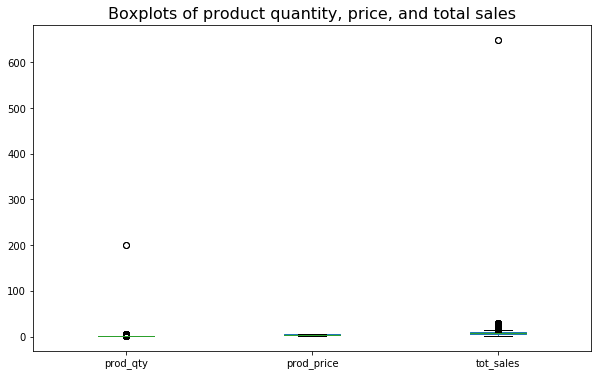

In [16]:
#Box plot of prod_qty, tot_sales and prod_price
#Draw boxplots

df.plot.box(y=['prod_qty','prod_price','tot_sales'],
               figsize=(10,6))

plt.title('Boxplots of product quantity, price, and total sales', fontsize=16)

In [17]:
outlier = df[df["prod_qty"] > 100]
outlier

,date,store_nbr,card_num,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,prod_price,prod_size,prod_unit
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,3.25,380,g
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,3.25,380,g


In [18]:
# check other purchase of that card number
df[df["card_num"] == "226000"]

,date,store_nbr,card_num,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,prod_price,prod_size,prod_unit
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,3.25,380,g
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,3.25,380,g


In [19]:
df = df[df['prod_qty'] < 100]

In [20]:
df[['prod_qty', 'tot_sales']].max()

prod_qty      5.0
tot_sales    29.5
dtype: float64

Text(0.5, 1.0, 'Boxplots of product quantity, price, and total sales')

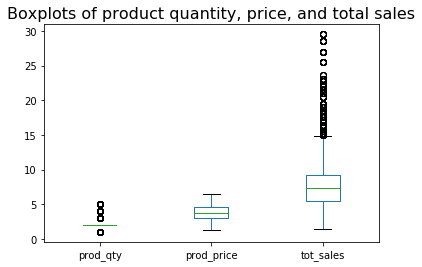

In [21]:
df.plot.box(y =["prod_qty", "prod_price", "tot_sales"])
plt.title("Boxplots of product quantity, price, and total sales",fontsize=16)

In [22]:
#Check datetime values
df.describe(include=np.datetime64)

,date
count,264834
unique,364
top,2018-12-24 00:00:00
freq,939
first,2018-07-01 00:00:00
last,2019-06-30 00:00:00


In [23]:
# create list of date from 07/01/2018 to 06/30/2019
date_range = pd.DataFrame(pd.date_range('2018-07-01', '2019-06-30').to_list(), columns = ['date'])
#Merge this list to column date, showing indicator
date_merge = pd.merge(df['date'], date_range, on= 'date', how= 'outer', indicator=True)
#Row that has indicator (_merge column) as right_only contains the missing date
date_merge[date_merge['_merge'] == 'right_only']

,date,_merge
264834,2018-12-25,right_only


In [24]:
#Create new columns for year, month, and weekday
df['year'], df['month'], df['weekday'] = \
df['date'].dt.year, df['date'].dt.month, df['date'].dt.day_name()

In [25]:
df.head()

,date,store_nbr,card_num,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,prod_price,prod_size,prod_unit,year,month,weekday
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00,175,g,2018,10,Wednesday
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2.10,175,g,2019,5,Tuesday
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45,170,g,2019,5,Monday
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0,3.00,175,g,2018,8,Friday
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8,4.60,150,g,2018,8,Saturday


In [26]:
df.describe(include = object)

,store_nbr,card_num,txn_id,prod_nbr,prod_name,prod_unit,weekday
count,264834,264834,264834,264834,264834,264834,264834
unique,272,72636,263125,114,114,3,7
top,226,162039,228741,102,Kettle Mozzarella Basil Pesto 175g,g,Sunday
freq,2020,18,3,3304,3304,255513,38717


Noticing the number of unique customers (card_nbr) and transactions (txn_id), we can see that one customer can have multiple transactions. However, one customer should have one transaction on the same date, in the same store at a time. I would like to make sure we don't have any duplicated transaction in any way.

In [27]:
#Drop duplicates if available
df = df.drop_duplicates(ignore_index = True)

#Print data length
print(f'There are {len(df)} unique data rows.')

There are 264833 unique data rows.


In [28]:
# check how many row that have the same information of  date, store_nbr, card_nbr and txn_id
print(f"There are {df.duplicated(['date', 'store_nbr', 'card_num', 'txn_id']).sum()} \
rows that the same information of date, store_number, customer, and transaction id.")

There are 1704 rows that the same information of date, store_number, customer, and transaction id.


In [29]:
#Create dataframe including date, store_nbr, card_nbr, txn_id, and prod_nbr that have same txn_id
dup_df = df[df.duplicated('txn_id', keep= False)][['date', 'store_nbr', 'card_num', 'txn_id', 'prod_nbr']]

count_df = dup_df.groupby(['txn_id']).nunique()

In [30]:
dup_df.head()

,date,store_nbr,card_num,txn_id,prod_nbr
41,2019-05-20,55,55073,48887,4
42,2019-05-20,55,55073,48887,113
376,2019-01-10,7,7364,7739,50
377,2019-01-10,7,7364,7739,20
418,2018-10-18,12,12301,10982,50


In [31]:
#Print out data that have more than one unique value of date, store_nbr, or card_nbr
count_df[(count_df['date'] != 1) |
         (count_df['store_nbr'] != 1) |
         (count_df['card_num'] != 1)]

,date,store_nbr,card_num,txn_id,prod_nbr
txn_id,,,,,
155468,2,1,2,1,2
155469,2,1,2,1,2
156002,2,1,1,1,2
50042,2,1,1,1,2


#we got four duplicate transactions, let get more information about that


In [32]:
# print the duplicate transactions.
df[(df['txn_id'] == "155468")|(df['txn_id'] == "155469")|
  (df['txn_id'] == "156002")|(df['txn_id'] == "50042")].sort_values(["date", "card_num"])

,date,store_nbr,card_num,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,prod_price,prod_size,prod_unit,year,month,weekday
127899,2018-08-13,155,155010,155468,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,2.7,150,g,2018,8,Monday
110173,2018-11-16,155,155072,155468,29,French Fries Potato Chips 175g,2,6.0,3.0,175,g,2018,11,Friday
110174,2018-11-30,155,155072,155469,110,WW Original Corn Chips 200g,2,3.8,1.9,200,g,2018,11,Friday
219242,2018-12-16,56,56003,50042,53,RRD Sweet Chilli Sour Cream 165g,2,6.0,3.0,165,g,2018,12,Sunday
219243,2018-12-17,56,56003,50042,96,WW Original Stacked Chips 160g,2,3.8,1.9,160,g,2018,12,Monday
45913,2019-02-09,155,155153,156002,25,Pringles SourCream Onion 134g,2,7.4,3.7,134,g,2019,2,Saturday
45912,2019-02-23,155,155153,156002,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,5.9,380,g,2019,2,Saturday
127896,2019-06-05,155,155010,155469,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,4.4,170,g,2019,6,Wednesday


In [33]:
#Check if there're duplicated transactions and product id
(df["prod_nbr"] ==1 ).any()


False

In [34]:
# remove the duplicate transactions.
df=df[(df['txn_id'] != "155468")&(df['txn_id'] != "155469")&
  (df['txn_id'] != "156002")&(df['txn_id'] != "50042")]

#Extract information from product name

In [35]:
df.head()

,date,store_nbr,card_num,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,prod_price,prod_size,prod_unit,year,month,weekday
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00,175,g,2018,10,Wednesday
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2.10,175,g,2019,5,Tuesday
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45,170,g,2019,5,Monday
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0,3.00,175,g,2018,8,Friday
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8,4.60,150,g,2018,8,Saturday


In [36]:
#Check statistic of size
df['prod_size'].describe()

count    264825.000000
mean        182.425258
std          64.324955
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: prod_size, dtype: float64

In [37]:
print(f"Number of unique package sizes: {df['prod_size'].nunique()}")

Number of unique package sizes: 21


In [38]:
print(f"Unique values of size units:\n{df['prod_unit'].value_counts()}")

Unique values of size units:
g                     255504
G                       6064
g Swt Pot Sea Salt      3257
Name: prod_unit, dtype: int64


Swt pot sea salt is  not unit.

In [39]:
df[df["prod_unit"] == "g Swt Pot Sea Salt"]["prod_name"].sample(5)

72882     Kettle 135g Swt Pot Sea Salt
224802    Kettle 135g Swt Pot Sea Salt
138873    Kettle 135g Swt Pot Sea Salt
7629      Kettle 135g Swt Pot Sea Salt
199654    Kettle 135g Swt Pot Sea Salt
Name: prod_name, dtype: object

All product have same unit and same size so we don't need the prod_unit columns.

In [40]:
#df = df.drop("prod_unit", axis =1)

#Remove package size and unit out of the product name
df['prod_name'] = df['prod_name'].str.replace(r'\d+.', '').str.rstrip(' ')

In [41]:
df.head()

,date,store_nbr,card_num,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,prod_price,prod_size,prod_unit,year,month,weekday
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,3.00,175,g,2018,10,Wednesday
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,2.10,175,g,2019,5,Tuesday
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,1.45,170,g,2019,5,Monday
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,3.00,175,g,2018,8,Friday
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,4.60,150,g,2018,8,Saturday


Product brand

Extract brand name 

In [42]:
print("Unique Product name")
np.sort(df["prod_name"].unique()).tolist()

Unique Product name


['Burger Rings',
 'CCs Nacho Cheese',
 'CCs Original',
 'CCs Tasty Cheese',
 'Cheetos Chs   Bacon Balls',
 'Cheetos Puffs',
 'Cheezels Cheese',
 'Cheezels Cheese Box',
 'Cobs Popd Sea Salt  Chips',
 'Cobs Popd Sour Crm   Chives Chips',
 'Cobs Popd Swt Chlli  Sr Cream Chips',
 'Dorito Corn Chp     Supreme',
 'Doritos Cheese      Supreme',
 'Doritos Corn Chip Mexican Jalapeno',
 'Doritos Corn Chip Southern Chicken',
 'Doritos Corn Chips  Cheese Supreme',
 'Doritos Corn Chips  Nacho Cheese',
 'Doritos Corn Chips  Original',
 'Doritos Mexicana',
 'Doritos Salsa       Medium',
 'Doritos Salsa Mild',
 'French Fries Potato Chips',
 'Grain Waves         Sweet Chilli',
 'Grain Waves Sour    Cream Chives',
 'GrnWves Plus Btroot   Chilli Jam',
 'Infuzions BBQ Rib   Prawn Crackers',
 'Infuzions Mango     Chutny Papadums',
 'Infuzions SourCream Herbs Veg Strws',
 'Infuzions Thai SweetChili PotatoMix',
 'Infzns Crn Crnchers Tangy Gcamole',
 'Kettle  Swt Pot Sea Salt',
 'Kettle Chilli',
 'Kettle Hone

We can easily recognize a brand name of a product by the first few words of a product name. Now, we can create a dictionary of brand names as values and the first words of product names as keys.

#Create brand name dictionary

brand_dict = {'Burger':'Burger Rings',
 'CCs':'CCs',
 "Cheetos":'Cheetos',
 'Cobs':'Cobs',
' Dorito':'Dorito',
 'Doritos':'Doritos',
 'French':'French',
 'Grain':'Grain Waves',
 'GrnWves':'GrnWves',
 'Infuzions':'Infuzions',
 'Infzns':'Infzns',
 'Kettle':'Kettle',
 'NCC':'NCC',
 'Natural':'Natural Chip',
 'Old':'Old El Paso',
 'Pringles':'Pringles',
 'RRD':'RRD',
 'Red':'Red Rock Deli',
 'Smith':'Smith', 
 'Smiths':'Smiths',
 'Snbts':'Snbts',
 'Sunbites':'Sunbites',
 'Thins':'Thins',
 'Tostitos':'Tostitos',
 'Twisties':'Twisties',
 'Tyrrells':'Tyrrells',
 'WW':'WW',
 'Woolworths':'Woolworths'}

In [43]:
#Create brand name dictionary
brand_dict = {'Burger':'Burger Rings', 'CCs':'CCs', 'Cheetos':'Cheetos',
              'Cheezels':'Cheezels','Cobs':'Cobs', 'Dorito':'Doritos', 
              'Doritos':'Doritos', 'French':'French Fries','Infuzions':'Infuzions',
              'Infzns':'Infuzions', 'Kettle':'Kettle', 'Natural':'Natural Chip Co',
              'NCC':'Natural Chip Co', 'Old':'Old El Paso', 'Pringles':'Pringles', 
              'RRD':'Red Rock Deli','Red':'Red Rock Deli', 'Smith':'Smiths', 
              'Smiths':'Smiths','Grain':'Sunbites', 'GrnWves':'Sunbites',
              'Snbts':'Sunbites', 'Sunbites':'Sunbites', 'Thins':'Thins',
              'Tostitos':'Tostitos', 'Twisties':'Twisties', 'Tyrrells':'Tyrrells', 
              'Woolworths':'Woolworths', 'WW':'Woolworths'}

Next, create name column and adjust the prod_name column.

In [44]:
# create brand name.
df['brand'] = df['prod_name'].astype(str).str.extract(r'(^\w+)')
df['brand'] = df['brand'].map(brand_dict)

In [45]:
df.head()

,date,store_nbr,card_num,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,prod_price,prod_size,prod_unit,year,month,weekday,brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,3.00,175,g,2018,10,Wednesday,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,2.10,175,g,2019,5,Tuesday,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,1.45,170,g,2019,5,Monday,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,3.00,175,g,2018,8,Friday,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,4.60,150,g,2018,8,Saturday,Kettle


In [46]:
# print out the unique brand name
print(f"Unique brand name:\n{df['brand'].unique()}")

Unique brand name:
['Natural Chip Co' 'CCs' 'Smiths' 'Kettle' 'Old El Paso' 'Sunbites'
 'Doritos' 'Twisties' 'Woolworths' 'Thins' 'Burger Rings' 'Cheezels'
 'Infuzions' 'Red Rock Deli' 'Pringles' 'Tyrrells' 'Cobs' 'French Fries'
 'Tostitos' 'Cheetos']





Product name

In [47]:
# remove space in product name
df['prod_name'] = df['prod_name'].apply(lambda x : " ".join(x.split()))

Look at full data of product name.

In [48]:
pd.set_option('display.max_colwidth', None)
#group by all brand name
df[['brand','prod_name']].groupby('brand').agg(lambda x: '; '.join(set(x))).reset_index()

,brand,prod_name
0,Burger Rings,Burger Rings
1,CCs,CCs Tasty Cheese; CCs Nacho Cheese; CCs Original
2,Cheetos,Cheetos Chs Bacon Balls; Cheetos Puffs
3,Cheezels,Cheezels Cheese; Cheezels Cheese Box
4,Cobs,Cobs Popd Sea Salt Chips; Cobs Popd Sour Crm Chives Chips; Cobs Popd Swt Chlli Sr Cream Chips
5,Doritos,Doritos Corn Chips Nacho Cheese; Doritos Corn Chips Cheese Supreme; Doritos Salsa Mild; Doritos Mexicana; Doritos Salsa Medium; Doritos Cheese Supreme; Dorito Corn Chp Supreme; Doritos Corn Chip Southern Chicken; Doritos Corn Chips Original; Doritos Corn Chip Mexican Jalapeno
6,French Fries,French Fries Potato Chips
7,Infuzions,Infuzions SourCream Herbs Veg Strws; Infuzions Thai SweetChili PotatoMix; Infzns Crn Crnchers Tangy Gcamole; Infuzions BBQ Rib Prawn Crackers; Infuzions Mango Chutny Papadums
8,Kettle,Kettle Swt Pot Sea Salt; Kettle Tortilla ChpsFeta Garlic; Kettle Tortilla ChpsBtroot Ricotta; Kettle Mozzarella Basil Pesto; Kettle Honey Soy Chicken; Kettle Sensations Siracha Lime; Kettle Tortilla ChpsHny Jlpno Chili; Kettle Sensations Camembert Fig; Kettle Sea Salt And Vinegar; Kettle Chilli; Kettle Original; Kettle Sensations BBQ Maple; Kettle Sweet Chilli And Sour Cream
9,Natural Chip Co,Natural ChipCo Sea Salt Vinegr; Natural Chip Co Tmato Hrb Spce; NCC Sour Cream Garden Chives; Natural ChipCo Hony Soy Chckn; Natural Chip Compny SeaSalt


In [49]:
# Remove Old El Paso brand
df = df[(df['brand'] != "Old El Paso") & (df['brand'] != 'Tostitos Splash Of Lime')]

In [50]:
#Print out product names that have "salsa"
print(f"Product that have 'salsa':\n{df[df['prod_name'].str.contains('Salsa')]['prod_name'].unique()}")

Product that have 'salsa':
['Red Rock Deli SR Salsa Mzzrlla' 'Smiths Crinkle Cut Tomato Salsa'
 'Doritos Salsa Medium' 'Woolworths Mild Salsa' 'Woolworths Medium Salsa'
 'Doritos Salsa Mild']


#remove all the above product

In [51]:
df = df[(df["prod_name"] != "Doritos Salsa Medium")&
        (df["prod_name"] != "Doritos Salsa Mild")&
        (df["prod_name"] != "Woolworths Mild Salsa")&
        (df["prod_name"] != "Woolworths Medium Salsa")&
        (df["prod_name"] != "Red Rock Deli SR Salsa Mzzrlla")&
        (df["prod_name"] !=  "Smiths Crinkle Cut Tomato Salsa")

]

In [52]:
df["prod_qty"].unique

<bound method Series.unique of 0         2
1         3
2         2
3         5
4         3
         ..
264828    2
264829    1
264830    2
264831    2
264832    2
Name: prod_qty, Length: 246731, dtype: int64>

#Transaction Data visualization.
#see the distribution of "total sale", "product size", "product price" and product quantity.


In [53]:
# list of product name and numarical variable
num_col = [ "tot_sales", "prod_price", "prod_size","prod_qty"]
num_name = ["TOTAL_SALES", "PRODUCT_PRICE", "PRODUCT_SIZE", "PRODUCT_QTY"]




 Total Sales mu = 7.32 and sigma = 2.47


 PRoduct Price : mu = 3.83 and sigma = 1.08


 Product Size: mu = 175.58 and sigma = 59.43



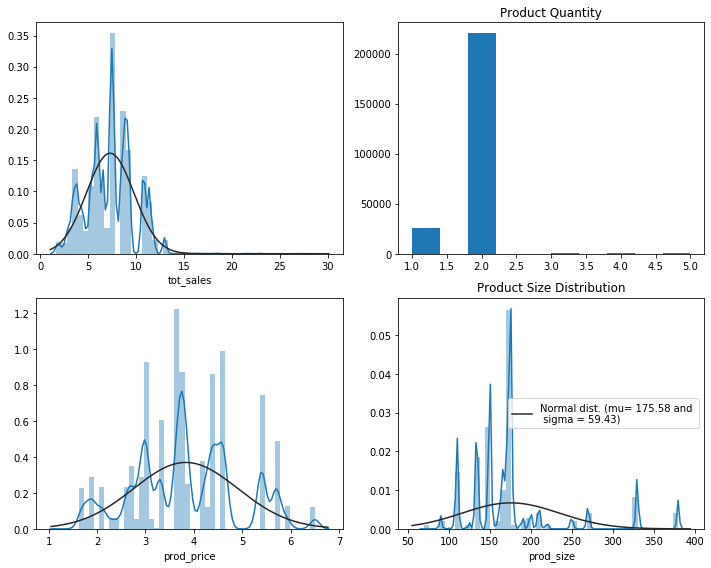

In [54]:

from scipy import stats
from scipy.stats import norm, skew #for some statistics

# plots distribusions
#Loop through 4 graphs
fig, axes = plt.subplots(2,2, figsize= (10,8))
sns.distplot(df["tot_sales"], fit= norm, ax= axes[0,0])
 # Get the fitted parameters used by the function
(mu1, sigma1) = norm.fit(df["tot_sales"])
print('\n Total Sales mu = {:.2f} and sigma = {:.2f}\n'.format(mu1, sigma1))
plt.legend(['Normal dist.(mu= {:.2f} and \nsigma=s{:.2f})'.format(mu1, sigma1)],
              loc= 'best')
plt.ylabel("Frequency")
plt.title('Total Sale Distribution')



df["prod_qty"].plot.hist(title=("Product Quantity"), ax= axes[0,1])
#(mu,sigm ) = norm.fit(df["prod_qty"], fit = norm)
#print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#plt.legend(['Normal dist.(mu= {:.2f} and \n sigma = s {:.2f})'.format(mu, sigma)],
#         loc = 'best')
plt.title('Product Quantity Distribution')




sns.distplot(df['prod_price'], fit = norm, ax= axes[1,0])
(mu2, sigma2)= norm.fit(df['prod_price'])
print('\n PRoduct Price : mu = {:.2f} and sigma = {:.2f}\n'.format(mu2, sigma2))
plt.legend(['Normal dist.(mu = {:.2f} and \n sigma = {:.2f})'.format(mu2, sigma2)],
         loc = 'best')
plt.ylabel("Frequency")
plt.title('Product Price Distribution')


sns.distplot(df["prod_size"], fit= norm, ax= axes[1,1])
(mu3, sigma3) = norm.fit(df["prod_size"])
print('\n Product Size: mu = {:.2f} and sigma = {:.2f}\n'.format(mu3, sigma3))
plt.legend(['Normal dist. (mu= {:.2f} and \n sigma = {:.2f})'.format(mu3, sigma3)],
          loc = "best")
plt.ylabel("Frequency")
plt.title('Product Size Distribution')


axes[0,0].set_ylabel(None)
axes[0,1].set_ylabel(None)
axes[1,0].set_ylabel(None)
axes[1,1].set_ylabel(None)
plt.tight_layout()


#there is skewness in Total product sales we need to normalize it.


## Use Emperical rule to the outlier and anamolies in the date set.


In [55]:
df["tot_sales"].describe()

count    246731.000000
mean          7.316141
std           2.474897
min           1.700000
25%           5.800000
50%           7.400000
75%           8.800000
max          29.500000
Name: tot_sales, dtype: float64

In [56]:
upper_limit =  mu1 + 3* sigma1
lower_limit =  mu1 - 3* sigma1

In [57]:
print(upper_limit)
print(lower_limit)

14.740815424748385
-0.10853411433340376


In [58]:
df.shape

(246731, 15)

In [59]:
# remove unwanted data, we only consider 99.97 % data
df = df[(df['tot_sales'] < upper_limit)] 

In [60]:
df.shape

(246155, 15)


 Total Sales mu = 7.29 and sigma = 2.40


 PRoduct Price : mu = 3.83 and sigma = 1.08


 Product Size: mu = 175.55 and sigma = 59.39



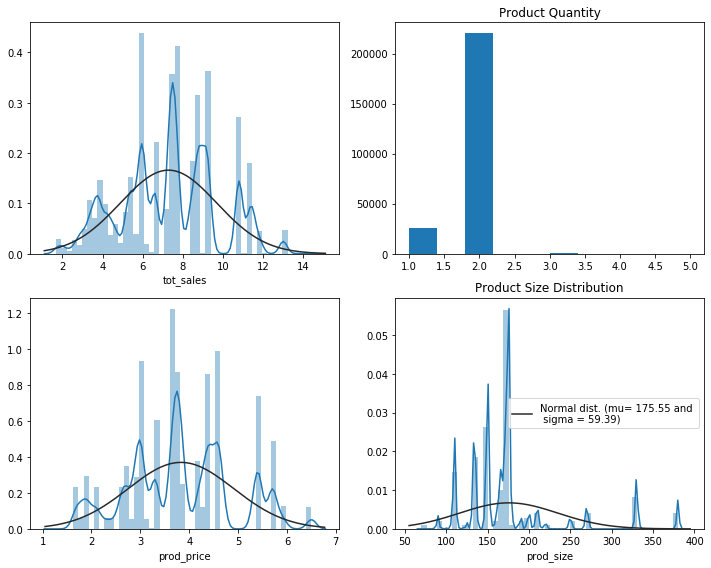

In [61]:

from scipy import stats
from scipy.stats import norm, skew #for some statistics

# plots distribusions
#Loop through 4 graphs
fig, axes = plt.subplots(2,2, figsize= (10,8))
sns.distplot(df["tot_sales"], fit= norm, ax= axes[0,0])
 # Get the fitted parameters used by the function
(mu1, sigma1) = norm.fit(df["tot_sales"])
print('\n Total Sales mu = {:.2f} and sigma = {:.2f}\n'.format(mu1, sigma1))
plt.legend(['Normal dist.(mu= {:.2f} and \nsigma=s{:.2f})'.format(mu1, sigma1)],
              loc= 'best')
plt.ylabel("Frequency")
plt.title('Total Sale Distribution')



df["prod_qty"].plot.hist(title=("Product Quantity"), ax= axes[0,1])
#(mu,sigm ) = norm.fit(df["prod_qty"], fit = norm)
#print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#plt.legend(['Normal dist.(mu= {:.2f} and \n sigma = s {:.2f})'.format(mu, sigma)],
#         loc = 'best')
plt.title('Product Quantity Distribution')




sns.distplot(df['prod_price'], fit = norm, ax= axes[1,0])
(mu2, sigma2)= norm.fit(df['prod_price'])
print('\n PRoduct Price : mu = {:.2f} and sigma = {:.2f}\n'.format(mu2, sigma2))
plt.legend(['Normal dist.(mu = {:.2f} and \n sigma = {:.2f})'.format(mu2, sigma2)],
         loc = 'best')
plt.ylabel("Frequency")
plt.title('Product Price Distribution')


sns.distplot(df["prod_size"], fit= norm, ax= axes[1,1])
(mu3, sigma3) = norm.fit(df["prod_size"])
print('\n Product Size: mu = {:.2f} and sigma = {:.2f}\n'.format(mu3, sigma3))
plt.legend(['Normal dist. (mu= {:.2f} and \n sigma = {:.2f})'.format(mu3, sigma3)],
          loc = "best")
plt.ylabel("Frequency")
plt.title('Product Size Distribution')


axes[0,0].set_ylabel(None)
axes[0,1].set_ylabel(None)
axes[1,0].set_ylabel(None)
axes[1,1].set_ylabel(None)
plt.tight_layout()


##### Now we got clean data without outliers.

#### We can get the following informations.
* Most people spend more or less 10 dollers for single transations.
* More people preffer 2 bags  of chips in one go.
* People more likely to buy 3$-6$ price range chips.
* In each transaction a bag of chips has a size, on average of 100g-200g.

### Total sales and number of transaction over Time.

Text(0.5, 0, 'Period')

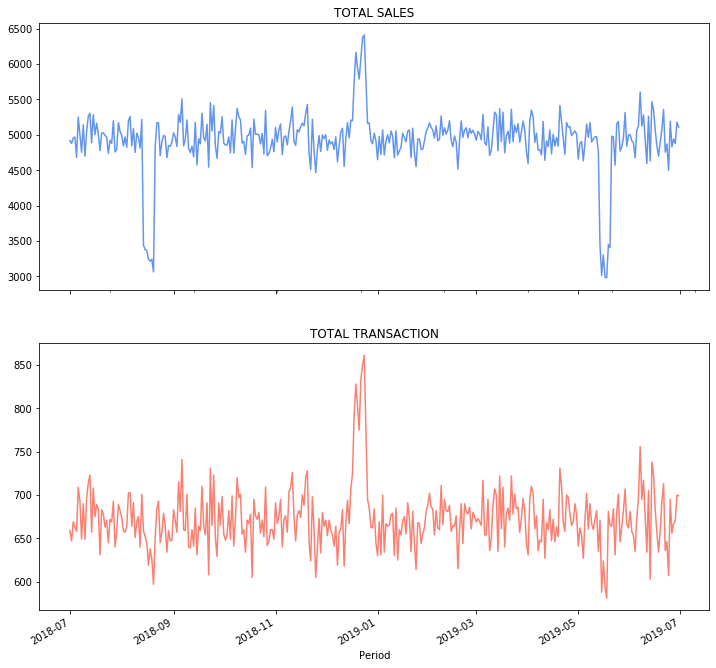

In [62]:
fig, axes = plt.subplots(2, 1, figsize = (12, 12))

# Total sales by dates
df.pivot_table(index = "date",
                values = "tot_sales",
              aggfunc = "sum").plot(ax = axes[0], title = "TOTAL SALES", legend = None,
                                   color = "cornflowerblue")

df.pivot_table(index = "date",
              values = "txn_id",
              aggfunc = lambda x : x.nunique()).plot(ax= axes[1], title ="TOTAL TRANSACTION", legend = None,
                                                    color = "salmon", sharex = True)
plt.xlabel("Period")

Text(0, 0.5, 'Total Transactions')

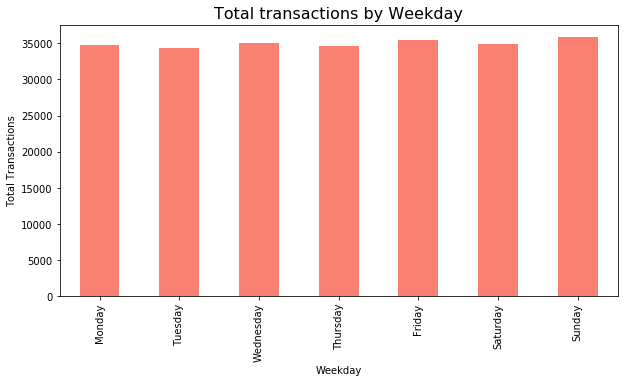

In [63]:
#Draw a count plot of total transactions by weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                 'Friday', 'Saturday', 'Sunday']

trans_by_weekday = df.pivot_table(index='weekday',
                                     values='txn_id',
                                     aggfunc=lambda x: x.nunique())

trans_by_weekday.loc[weekday_order].plot.bar(figsize=(10,5),
                                             color='salmon',
                                             legend=None)

plt.title('Total transactions by Weekday', fontsize=16)
plt.xlabel('Weekday')
plt.ylabel('Total Transactions')

Friday and Sunday have the highest number of transactions. However, the difference in number of transactions among weekdays is not significant.

## Total Sales by Store Number

In [64]:
#Aggregate total sales by store number and time.
sales_by_store = df.pivot_table(index = ["year", "month"], columns = ["store_nbr"],
                               values = 'tot_sales', aggfunc ='sum')

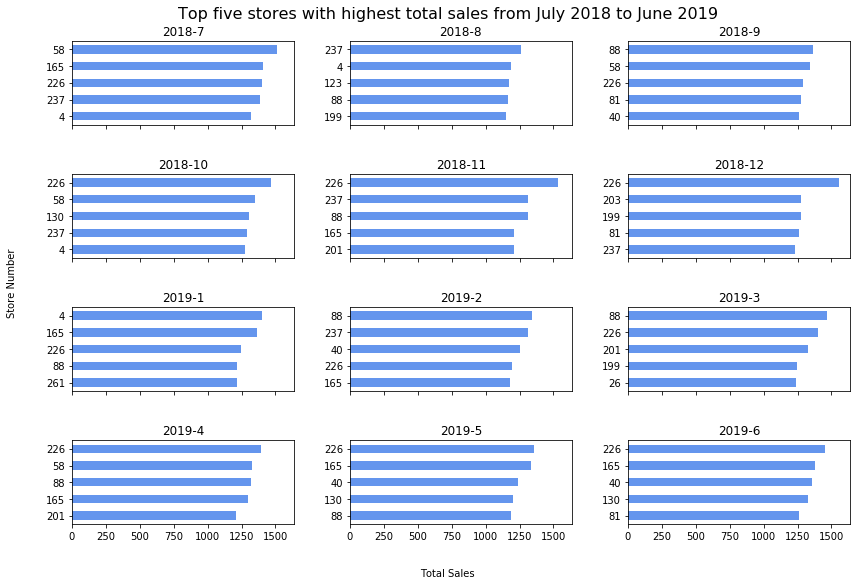

In [65]:
#Draw graphs of top five stores over time
period = sales_by_store.index.tolist()
fig, axes = plt.subplots(4, 3, figsize=(12,8), sharex=True)
fig.suptitle('Top five stores with highest total sales from July 2018 to June 2019', fontsize=16)
fig.text(0.5, -0.01, 'Total Sales', ha='center')
fig.text(-0.01, 0.5, 'Store Number', va='center', rotation='vertical')

for i, ax in enumerate(axes.flatten()):
    sales_by_store.iloc[i].nlargest(5).sort_values().plot.barh( \
        title=(str(period[i][0]) + '-' + str(period[i][1])),
        color='cornflowerblue', ax=ax)
    ax.set_ylabel(None)
       
plt.tight_layout(pad=3)

Shop number 226 is in top 5 in 11 out of 12 months, And it comes in top from Oct 2018 - Dec 2018 & Apr 2019 - Jun 2019.


### Top Sales by Brand

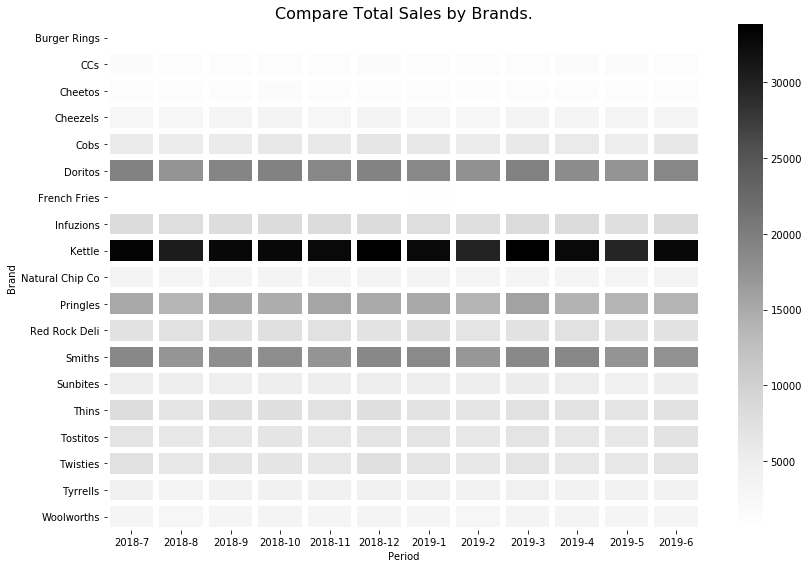

In [66]:
# Draw heatmap of total sales by brand and time.

sales_by_brand = df.pivot_table(columns=['year', 'month'],
                               index= 'brand',
                               values= 'tot_sales',
                               aggfunc= 'sum')

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(sales_by_brand,
           cmap= 'Greys',
           linewidths= 5,
           ax=ax)

plt.title("Compare Total Sales by Brands.", fontsize = 16)
plt.xlabel("Period")
plt.ylabel("Brand")
plt.tight_layout()



kettle is leading brand in the market, followed by Doritos, Smiths and Pringles.



In [67]:
# Loop over four brands

for i in ['Kettle', 'Doritos', 'Smiths', 'Pringles']:
    print('Most Po[ular flavours of ' + str(i) + 
         f": \t{df[df['brand'] == i]['prod_name'].value_counts().idxmax()}")

Most Po[ular flavours of Kettle: 	Kettle Tortilla ChpsHny Jlpno Chili
Most Po[ular flavours of Doritos: 	Doritos Corn Chips Cheese Supreme
Most Po[ular flavours of Smiths: 	Smiths Crnkle Chip Orgnl Big Bag
Most Po[ular flavours of Pringles: 	Pringles Barbeque


### Use word to see which flavours are popular of all products.

(-0.5, 399.5, 199.5, -0.5)

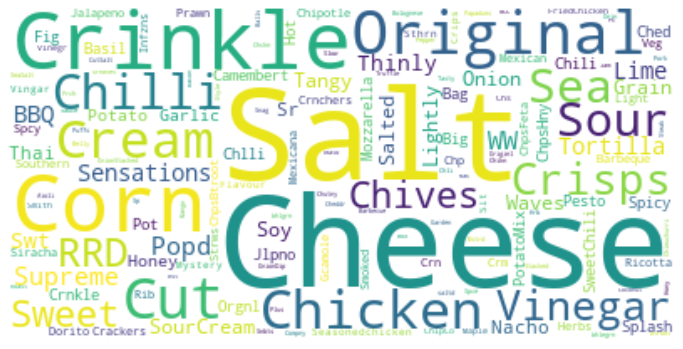

In [68]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(df["prod_name"])
stopwords = list(STOPWORDS) + ' '.join(df['brand'].unique()).split() + ['Chips']
wc = WordCloud(stopwords=stopwords,
              collocations = False,
              background_color = 'white',
              random_state=0).generate(text= text)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

We have Crinkle, Salt, Cheese and Corn are the most popular.

### Customer Data -Data Cleaning

In [73]:
df2 = pd.read_csv("QVI_purchase_behaviour.csv")

In [74]:
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [81]:
df2.columns=map(str.lower, df2.columns)
df2 = df2.rename(columns={'lylty_card_nbr':'card_nbr','premium_customer':'customer_type'})

In [82]:
df2.head()

,card_nbr,lifestage,customer_type
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   card_nbr       72637 non-null  int64 
 1   lifestage      72637 non-null  object
 2   customer_type  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [84]:
#change card number to categories.
df2["card_nbr"] = df2["card_nbr"].astype(str) 

In [85]:
df2.describe()

,card_nbr,lifestage,customer_type
count,72637,72637,72637
unique,72637,7,3
top,101059,RETIREES,Mainstream
freq,1,14805,29245


In [88]:
print('Customer Lifestage')
df2["lifestage"].unique().tolist()

Customer Lifestage


['YOUNG SINGLES/COUPLES',
 'YOUNG FAMILIES',
 'OLDER SINGLES/COUPLES',
 'MIDAGE SINGLES/COUPLES',
 'NEW FAMILIES',
 'OLDER FAMILIES',
 'RETIREES']

In [89]:
print("Customer Types")
df2["customer_type"].unique().tolist()

Customer Types


['Premium', 'Mainstream', 'Budget']

## Customer Data visualization.


In [92]:
print("Number of customer by Segments")
df2["customer_type"].value_counts()

Number of customer by Segments


Mainstream    29245
Budget        24470
Premium       18922
Name: customer_type, dtype: int64

Text(0, 0.5, 'Number of Customer')

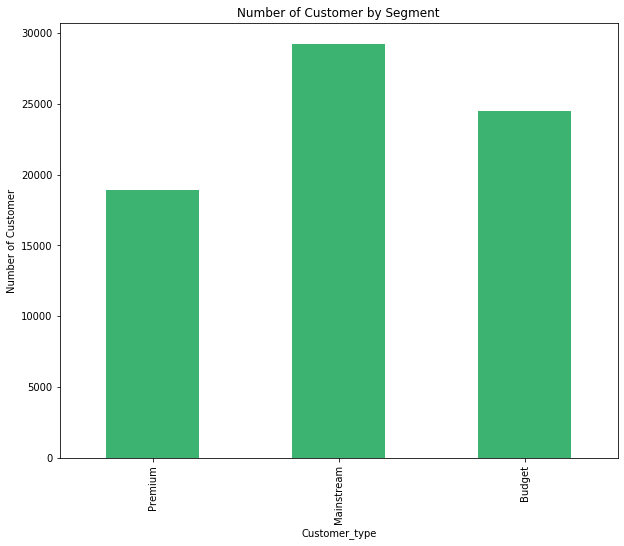

In [96]:
#count plot of number of customer by segment.
order= ['Premium', 'Mainstream', 'Budget']
df2["customer_type"].value_counts().loc[order].plot.bar(figsize = [10, 8],
                                                       color= "mediumseagreen")
plt.title("Number of Customer by Segment")
plt.xlabel("Customer_type")
plt.ylabel("Number of Customer")

* Most customer are in Mainstream.
* We are also interested in customer lifestage in each segment.

In [99]:
Col_order = ['YOUNG SINGLES/COUPLES',
 'YOUNG FAMILIES',
 'OLDER SINGLES/COUPLES',
 'MIDAGE SINGLES/COUPLES',
 'NEW FAMILIES',
 'OLDER FAMILIES',
 'RETIREES']

In [ ]:
#create a function with make stackl bar  plot with percentage.
def draw_bar(data):
    #Count number of unique by segment and lifestage.
    pivot_df = data.pivot_table(index= "customer_type",
                               values= "")